In [1]:
from numpy import pi
import pandas as pd
import warnings
import csv
import matplotlib.pyplot as plt
from qiskit_aer import Aer
import utils as utils

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Generiamo casualmente 128 punti
n_samples = 64
centers = 4
cluster_std = 0.60
random_state = 0
color_points = "White"
file_name = "k_means_data.csv"
points = utils.get_random_points(n_samples, centers, cluster_std, random_state, color_points, file_name)

In [4]:
""" Step 1: Generiamo casualmente k centroidi  """
backend = Aer.get_backend('qasm_simulator')
num_bit = 5
min_value = -0.9000
max_value = 0.9000
k = 4
centroids = []
for index in range(k):
    while True:
        x = utils.get_random_decimal_number(num_bit, backend, min_value, max_value)
        y = utils.get_random_decimal_number(num_bit, backend, min_value, max_value)
        new_centroid = (x, y)
        if new_centroid not in centroids:
            centroids.append(new_centroid)
            break
(bc, gc, oc, pc) = (centroids[0], centroids[1], centroids[2], centroids[3])

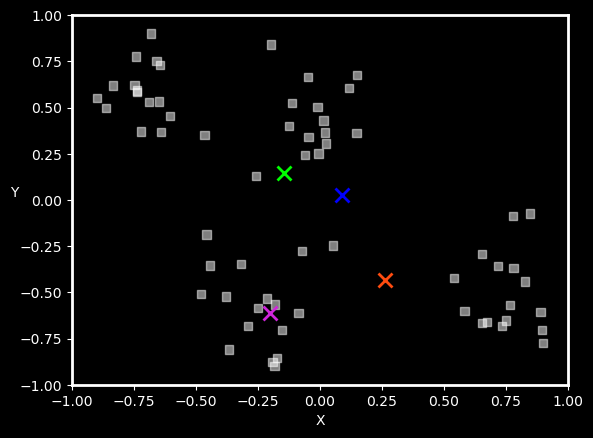

In [5]:
# Otteniamo e visualizziamo i punti e i centroidi
k_means_data = pd.read_csv('k_means_data.csv', usecols=['ID', 'X', 'Y', 'Cluster'])
(whiteData, blueData, greenData, orangeData, purpleData) = utils.get_clusters_data(k_means_data)
utils.plt_show_points_and_centroids(k_means_data, plt, bc, gc, oc, pc)

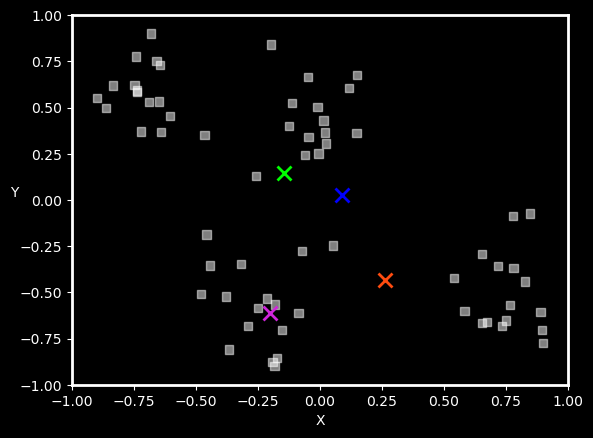

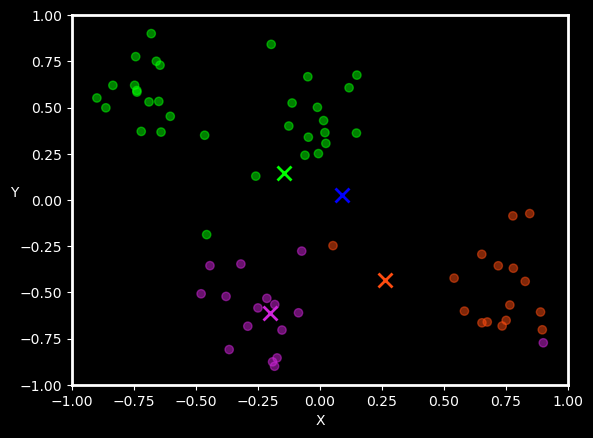

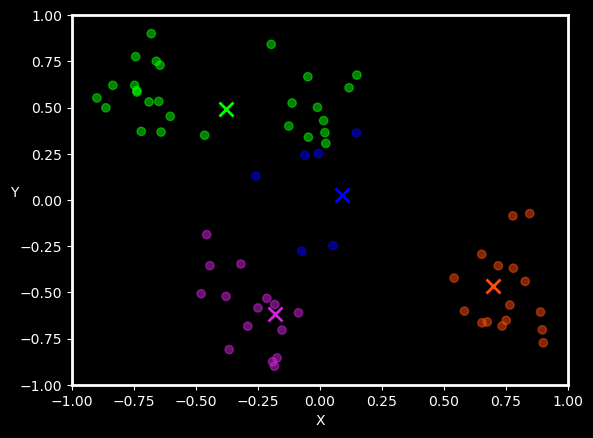

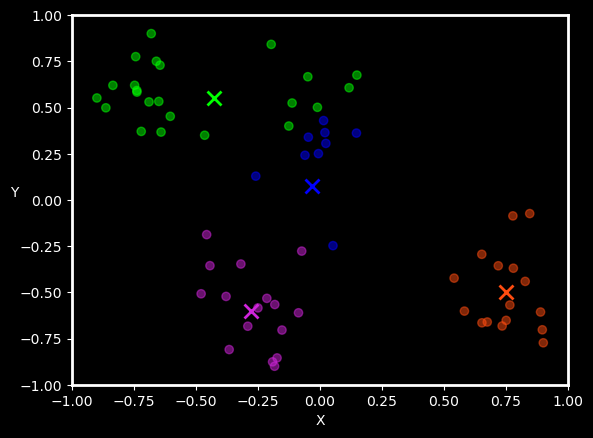

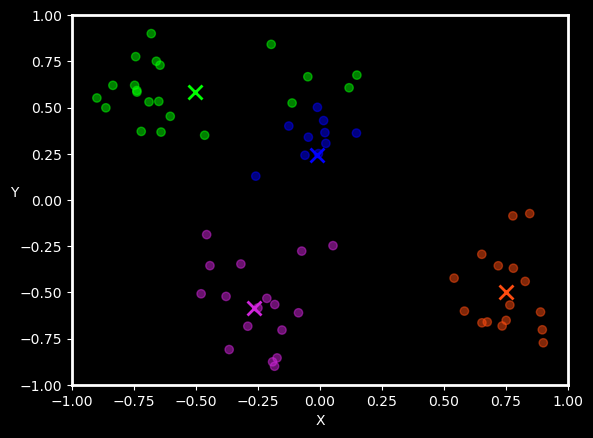

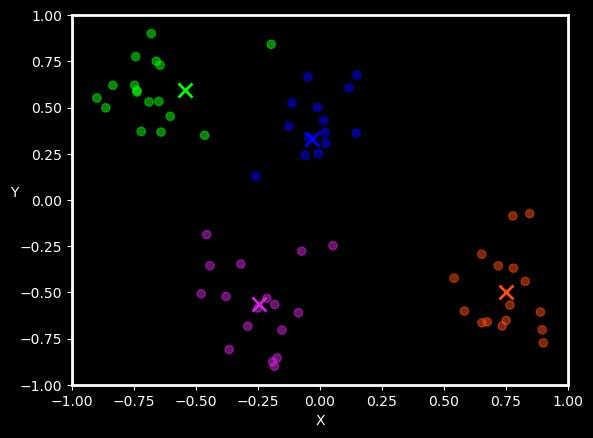

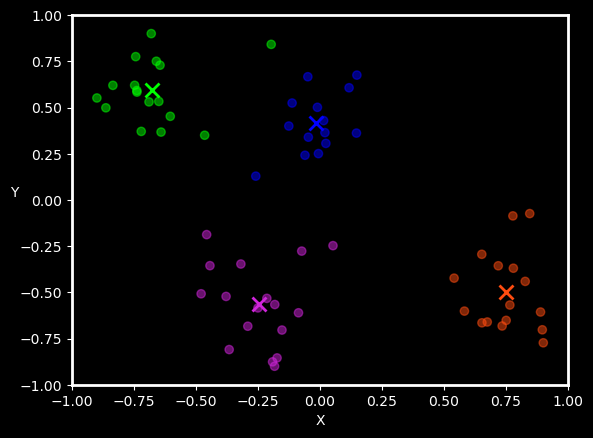

In [6]:
k_means_data = pd.read_csv('k_means_data.csv', usecols=['ID', 'X', 'Y', 'Cluster'])
utils.plt_show_points_and_centroids(k_means_data, plt, bc, gc, oc, pc)
""" Step 2: generazione di un partizionamento dei punti in k gruppi tramite il calcolo della distanza """
n = 5
for i in range(0, n):
    # ci ricaviamo i punti attuali
    points = list(k_means_data.itertuples(index=False, name=None))
    # assegnamo un colore ad ogni punto
    for j in range(0, len(points)):
        p = (points[j][1], points[j][2])
        phi_list = [((x + 1) * pi / 2) for x in [float(p[0]), bc[0], gc[0], oc[0], pc[0]]]
        theta_list = [((x + 1) * pi / 2) for x in [float(p[1]), bc[1], gc[1], oc[1], pc[1]]]
        new_cluster = utils.get_quantum_point_classification(theta_list, phi_list)
        points[j] = (points[j][0], points[j][1], points[j][2], new_cluster)
    # Aggiorniamo i punti nel file CSV
    with open('k_means_data.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['ID', 'X', 'Y', 'Cluster'])
        for i, point in enumerate(points, start=1):
            writer.writerow(point)
    # ci ricaviamo i dati aggiornati
    k_means_data = pd.read_csv('k_means_data.csv', usecols=['ID', 'X', 'Y', 'Cluster'])
    # Visualizziamo i punti e i centroidi 
    utils.plt_show_points_and_centroids(k_means_data, plt, bc, gc, oc, pc)
    # otteniamo i dati per ogni cluster
    (whiteData, blueData, greenData, orangeData, purpleData) = utils.get_clusters_data(k_means_data)
    """ Step 3: calcoliamo i nuovi centroidi del cluster considerando la media dei valori dei dati dei cluster. """
    # aggiorniamo i centroidi
    new_bc = utils.get_new_centroid(blueData, bc)
    new_gc = utils.get_new_centroid(greenData, gc)
    new_oc = utils.get_new_centroid(orangeData, oc)
    new_pc = utils.get_new_centroid(purpleData, pc)
    (bc, gc, oc, pc) = (new_bc, new_gc, new_oc, new_pc)
    """ Step 4. Ripetiamo lo step 2 fino a quando i centroidi non cambiano oppure fino a quando eseguiamo lo step 2 n volte). """
# output finale
utils.plt_show_points_and_centroids(k_means_data, plt, bc, gc, oc, pc)